# CUSTOMER SEGMENTATION PROJECT

In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings 
%matplotlib inline
warnings.filterwarnings('ignore')

In [114]:
df=pd.read_csv('Mall_Customers.csv')

In [115]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [116]:
#Analysis

In [117]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


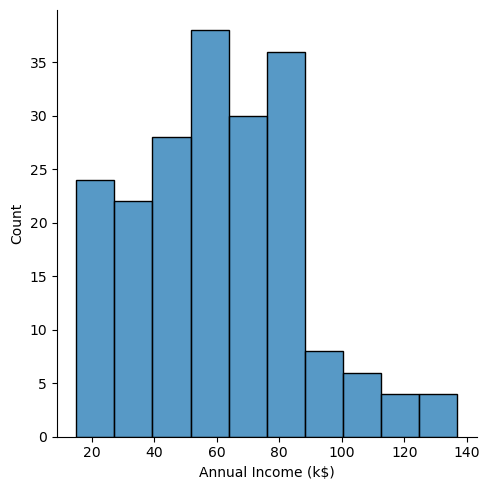

In [118]:
sns.displot(df["Annual Income (k$)"])

In [119]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<Figure size 640x480 with 0 Axes>

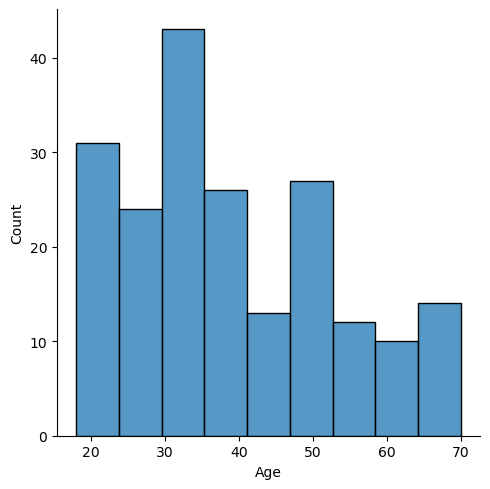

<Figure size 640x480 with 0 Axes>

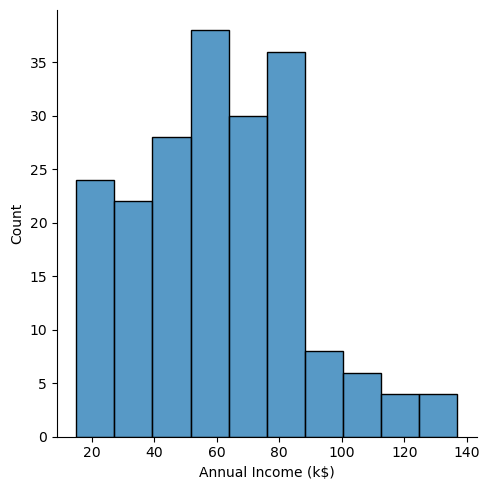

<Figure size 640x480 with 0 Axes>

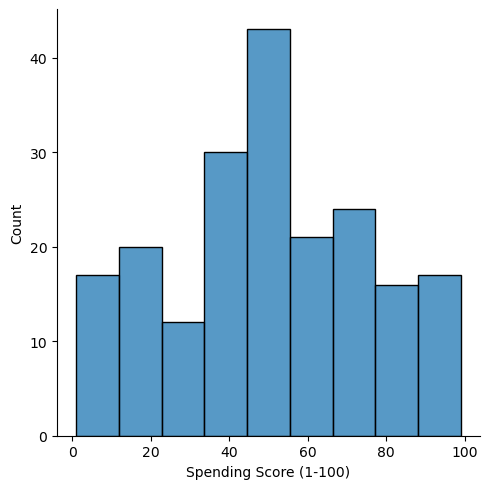

In [120]:
columns=['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns : 
    plt.figure()
    sns.displot(df[i])

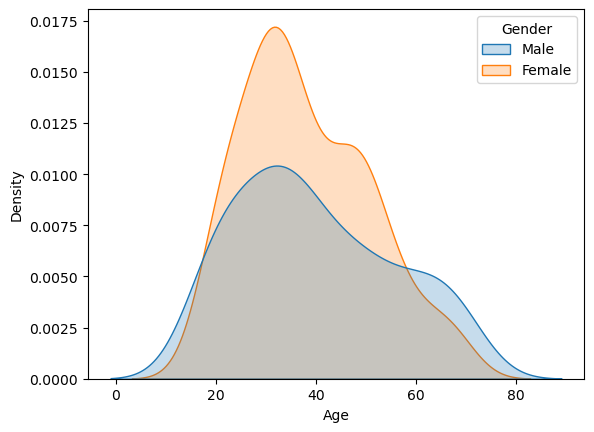

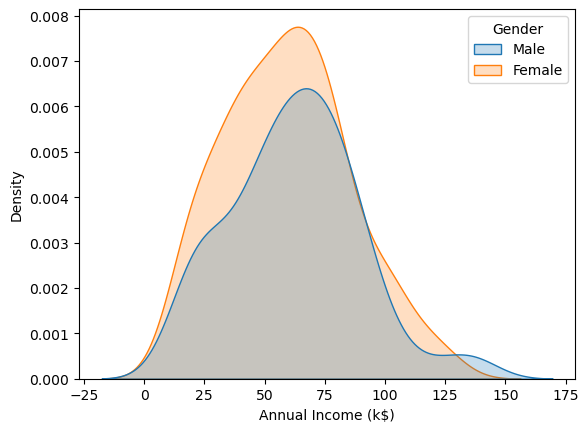

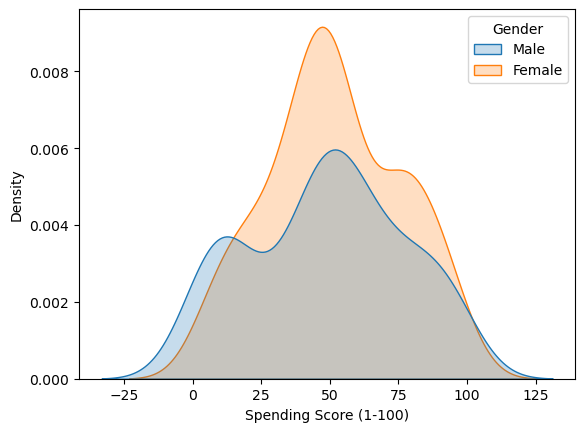

In [121]:
columns=['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns : 
    plt.figure()
    sns.kdeplot(df[i],shade=True,hue=df['Gender'])

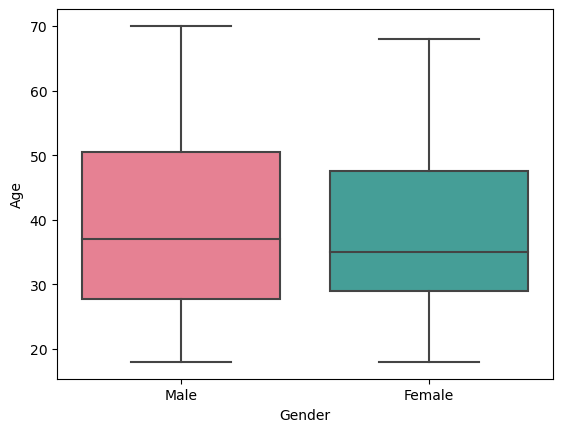

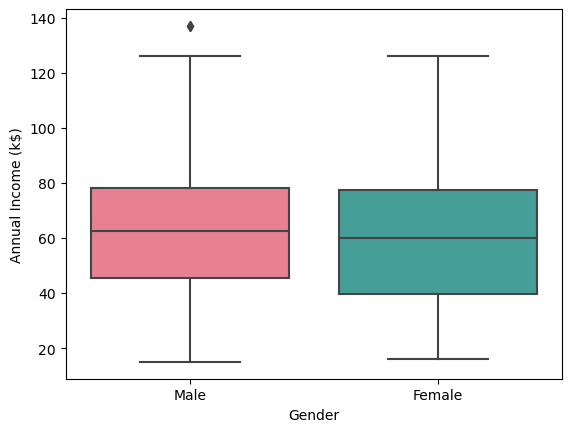

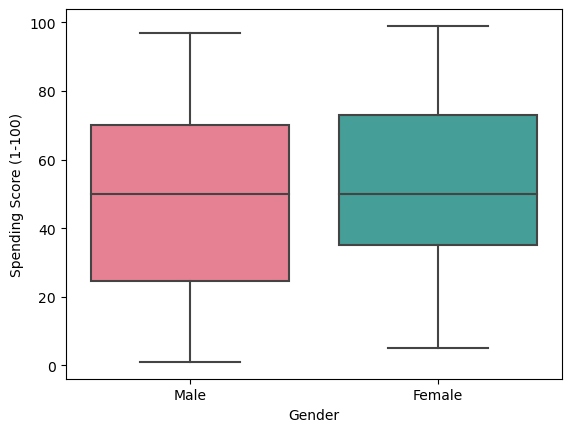

In [122]:
columns=['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns : 
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i],palette="husl")

In [123]:
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

In [124]:
#Bivariate Analysis

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

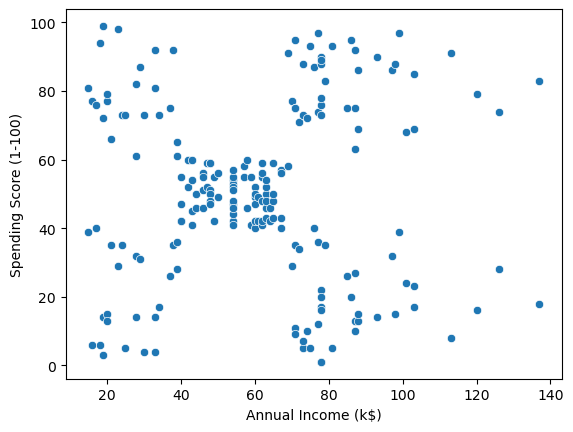

In [125]:
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)')

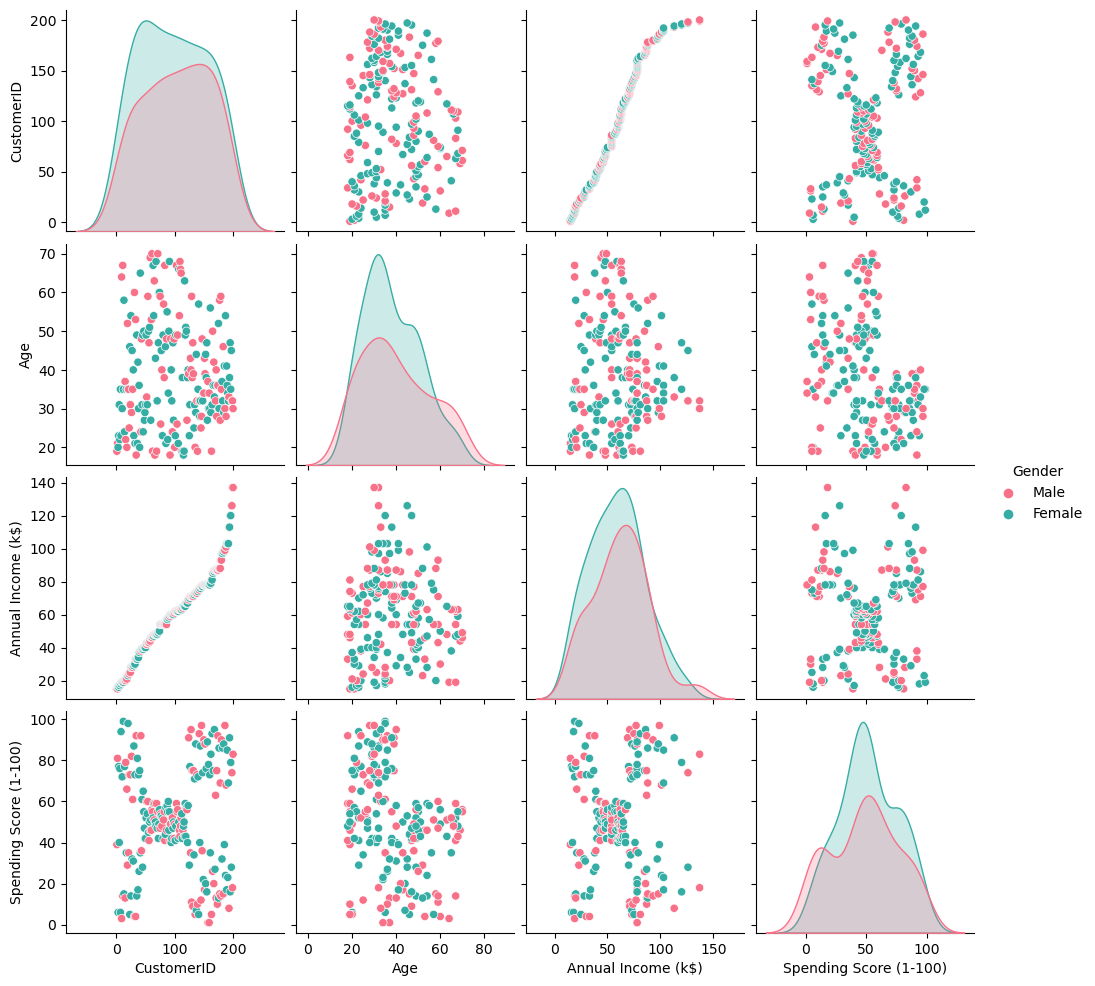

In [126]:
#df.drop('CustomerID',axis=1,inplace=True)
sns.pairplot(df,palette="husl",hue='Gender')


In [127]:
df.groupby(['Gender'])['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [128]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<AxesSubplot:>

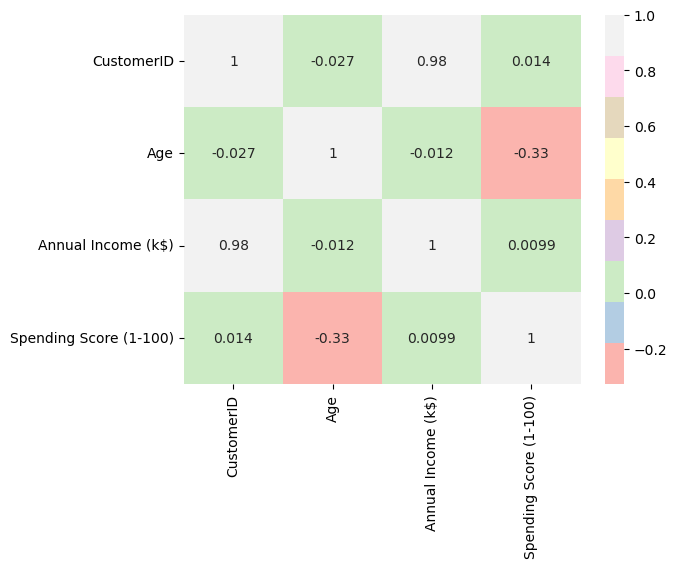

In [129]:
sns.heatmap(df.corr(),annot=True,cmap="Pastel1")

# Clustering

In [130]:
clustering=KMeans(n_clusters=3)

In [131]:
clustering.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [132]:
clustering.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [97]:
df['Income Cluster']=clustering.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [98]:
df['Income Cluster'].value_counts()

0    100
1     74
2     26
Name: Income Cluster, dtype: int64

In [99]:
clustering.inertia_

24354.29264033264

In [100]:
inertia_score=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_score.append(kmeans.inertia_)

In [101]:
inertia_score

[137277.28,
 48660.88888888889,
 23517.330930930937,
 13278.112713472485,
 8481.496190476191,
 5050.904761904762,
 3949.2756132756135,
 2857.441697191697,
 2220.6341269841273,
 1737.161255411255]

In [102]:
plt.plot(range(1,11),inertia_score)

 #### Based on the elbow method we should use 3 as a number of clusters

In [103]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster'],
      dtype='object')

In [104]:
df.groupby('Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,38.540000,69.020000,49.960000
1,39.500000,33.486486,50.229730
2,38.192308,105.076923,51.038462


In [46]:
#Bivariate Clustering

In [47]:
clustering1=KMeans()
clustering1.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])


KMeans()

In [48]:
df['Spending and Income Cluster']=clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,3
1,2,Male,21,15,81,1,5
2,3,Female,20,16,6,1,3
3,4,Female,23,16,77,1,5
4,5,Female,31,17,40,1,3


In [49]:
inertia_score1=[]
for i in range(1,11):
    kmeans1=KMeans(n_clusters=i)
    kmeans1.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_score1.append(kmeans1.inertia_)
plt.plot(range(1,11),inertia_score1)
    

#### Based on the elbow method we should choose 5 as number of  clusters

In [50]:
centers=pd.DataFrame(clustering1.cluster_centers_)
centers.columns=['x','y']

In [51]:
plt.figure(figsize=(8,6))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster')

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

In [52]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.318182,0.681818
1,0.600000,0.400000
2,0.517241,0.482759
3,0.619048,0.380952
4,0.600000,0.400000
5,0.571429,0.428571
6,0.595238,0.404762
7,0.700000,0.300000


In [53]:
df.groupby('Spending and Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,41.000000,80.181818,12.681818
1,43.955556,47.444444,51.244444
2,32.862069,78.551724,82.172414
3,44.142857,25.142857,19.523810
4,32.200000,109.700000,82.000000
5,25.333333,25.095238,80.047619
6,41.571429,63.952381,46.214286
7,41.000000,109.700000,22.000000


In [54]:
#multivariate clustering

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
scale=StandardScaler()

In [57]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,3
1,2,Male,21,15,81,1,5
2,3,Female,20,16,6,1,3
3,4,Female,23,16,77,1,5
4,5,Female,31,17,40,1,3


In [58]:
dff=pd.get_dummies(df,drop_first=True)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,1,19,15,39,1,3,1
1,2,21,15,81,1,5,1
2,3,20,16,6,1,3,0
3,4,23,16,77,1,5,0
4,5,31,17,40,1,3,0


In [59]:
dff.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [60]:
dff=dff[[ 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster','Spending and Income Cluster', 'Gender_Male']]
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,3
1,2,Male,21,15,81,1,5
2,3,Female,20,16,6,1,3
3,4,Female,23,16,77,1,5
4,5,Female,31,17,40,1,3


In [61]:
dff= pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3,4
0,-1.738999,-0.434801,0.361741,-0.072583,1.128152
1,-1.738999,1.195704,0.361741,0.807206,1.128152
2,-1.700830,-1.715913,0.361741,-0.072583,-0.886405
3,-1.700830,1.040418,0.361741,0.807206,-0.886405
4,-1.662660,-0.395980,0.361741,-0.072583,-0.886405


In [62]:
inertia_score2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(dff)
    inertia_score2.append(kmeans2.inertia_)
plt.plot(range(1,11),inertia_score2)
    

In [63]:
df.to_csv('Clustering.csv')